In [132]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xlsxwriter as xl
import math
from xlsxwriter import workbook
from xlsxwriter import worksheet
from xlsxwriter.workbook import Workbook
import os.path
import glob
from PIL import Image 
import PIL

In [143]:
print(os.getcwd())

c:\Users\Malik Konduri\Desktop


In [98]:
"contrast stretching"
def Contrast(img):
            "Colour Contrast"
            B = img[..., 0].astype('float32')
            G = img[..., 1].astype('float32')
            R = img[..., 2].astype('float32')

            min_b=np.amin(B)
            min_g = np.amin(G)
            min_r = np.amin(R)

            max_b =np.amax(B)
            max_g = np.amax(G)
            max_r = np.amax(R)
            x,y,z =img.shape
            for i in range(x):
                for j in range(y):
                    if img[i][j][0]>200 :
                        img[i][j]=(0,0,0)
                    else:
                        bv= ((img[i][j][0]-min_b)*(255))/(max_b-min_b)
                        if min_b>img[i][j][0]:
                            bv=0
                        elif max_b<img[i][j][0]:
                            bv=255

                        gv= ((img[i][j][1]-min_g)*(255))/(max_g-min_g)
                        if min_g>img[i][j][1]:
                            gv=0
                        elif max_g<img[i][j][1]:
                            gv=255

                        rv= ((img[i][j][2]-min_r)*(255))/(max_r-min_r)
                        if min_r>img[i][j][2]:
                            rv=0
                        elif max_r<img[i][j][2]:
                            rv=255


                        img[i][j]=(bv,gv,rv)
            return img

In [99]:
"Exg Image"
def BGR2ExG(img):
            "Excess Green Index"
            b = img[...,0].astype('float32')
            g = img[...,1].astype('float32')
            r = img[...,2].astype('float32')
            ExG = ((2*g) - r - b)  
            return ExG
""
def BGR2MExG(img):
            "Modified Excess Green Index"
            B = img[...,0].astype('float32')
            G = img[...,1].astype('float32')
            R = img[...,2].astype('float32')
            MExG = 1.262 * G - 0.884 * R - 0.311 * B
            return MExG
def BGR2CIVE(img):
            "Colour Index of Vegetation Extraction"
            B = img[...,0].astype('float32')
            G = img[...,1].astype('float32')
            R = img[...,2].astype('float32')
            CIVE = 0.441 * R - 0.811 * G + 0.385 * B + 18.78745
            return CIVE
def MExGCIVE(img):
            osimg = BGR2MExG(img) - BGR2CIVE(img)
            return osimg
def croped(im1,im2):
            im1[im2==0]=0
            return im1


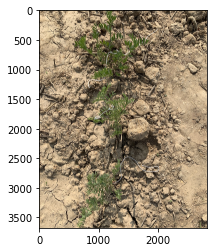

In [100]:
path='C:/Project files/image.jpg'
img_bgr = cv.imread(path)
x,y,z=img_bgr.shape
img_bgr_original = cv.imread(path)
# img_bgr =Contrast(img_bgr)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))

In [101]:
img_ExG = BGR2ExG(img_bgr)
img_MExG = BGR2MExG(img_bgr)
img_CIVE = BGR2CIVE(img_bgr)
img_MExGCIVE = MExGCIVE(img_bgr)

In [102]:
# def imageShow(image_list):
#     for i in image_list:
#         plt.imshow(i)
#         plt.show()    

In [103]:
img_MExGCIVE = (img_MExGCIVE).astype(np.uint8)
img_ExG= (img_ExG).astype(np.uint8)
img_CIVE= (img_CIVE).astype(np.uint8)
img_MExG= (img_MExG).astype(np.uint8)

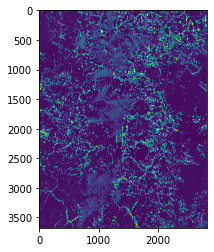

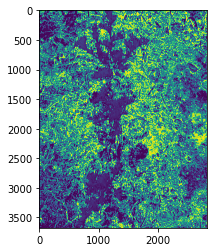

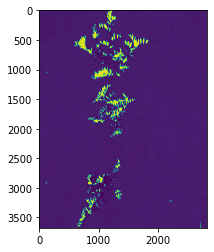

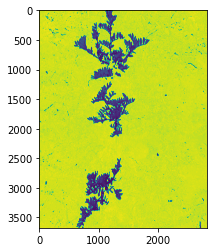

In [104]:
image_list = [img_ExG,img_MExG,img_CIVE,img_MExGCIVE]
image_titles = ['img_ExG','img_MExG','img_CIVE','img_MExGCIVE']
for i in range(len(image_list)):
    plt.figure(image_titles[i])
    plt.imshow(image_list[i])
plt.show() 

In [105]:
ret1, threshExG = cv.threshold(img_ExG,0,1, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, threshCIVE = cv.threshold(img_CIVE,0,1, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, threshMExG = cv.threshold(img_MExG,0,1, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret4, threshMExGCIVE = cv.threshold(img_MExGCIVE,0,1, cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

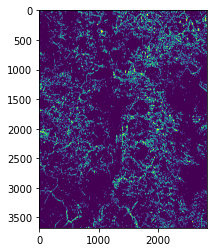

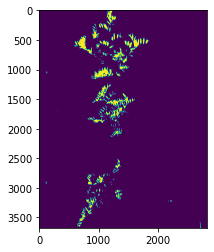

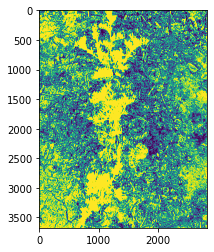

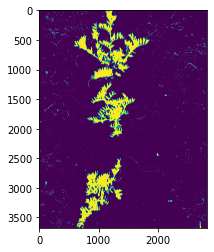

In [106]:
image_list = [threshExG,threshCIVE,threshMExG,threshMExGCIVE]
image_titles = ['threshExG','threshCIVE','threshMExG','threshMExGCIVE']
for i in range(len(image_list)):
    plt.figure(image_titles[i])
    plt.imshow(image_list[i])
plt.show() 

In [107]:
noOfTypes, matrix, allAreas, centroids = cv.connectedComponentsWithStats(threshMExGCIVE, connectivity=8)
sizes = allAreas[1:, -1]
noOfTypes = noOfTypes - 1
min_size = 3000  

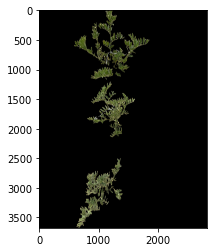

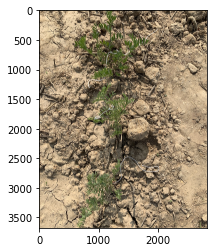

In [124]:
binaryFinalMask = np.zeros((matrix.shape))
            
for i in range(0,noOfTypes):
    if sizes[i] >= min_size:
        binaryFinalMask[matrix == i + 1] = 1

cropped_image = img_bgr
cropped_image = croped(img_bgr,binaryFinalMask)
titles = ['Original', 'cropped image']
images = [cv.cvtColor(cropped_image,cv.COLOR_BGR2RGB), cv.cvtColor(img_bgr_original,cv.COLOR_BGR2RGB)]

for i in range(len(images)):
    plt.figure(titles[i])
    plt.imshow(images[i])
plt.show()

In [128]:
def VIvalues(im1):
                H=[]
                S=[]
                I=[]
                Y=[]
                Cr=[]
                Cb=[]
                R=[]
                B=[]
                G=[]
                X=[]
                Y1=[]
                Z=[]
                L=[]
                A=[]
                B=[]
                NR =[]
                NG=[]
                NB=[]
                ExR=[]
                ExB=[]
                ExGR =[]
                GBD =[]
                RBD = []
                RGD=[]
                GRR=[]
                GBR=[]
                NGRD = []
                NGBD = []
                MNGRD =[]
                VD =[]
                RGBVI = []
                CI = []
                CIVE= []
                TGI =[]
                MExG =[]
                lab = cv.cvtColor(im1,cv.COLOR_BGR2LAB)
                xyz = cv.cvtColor(im1,cv.COLOR_BGR2XYZ)
                ycc=cv.cvtColor(im1,cv.COLOR_BGR2YCrCb)
                x,y,z=im1.shape
                n=0
                for i in range(x):
                    for j in range(y):
                        b=im1[i][j][0]
                        g=im1[i][j][1]
                        r=im1[i][j][2]
                        t=b+g+r

                        value_for_h =( ((0.5*(r-g)) + (r-b)) /( pow((r-g),2) + ( (r-b)*pow((g-b),0.5)) ))
                        ANGLE = 57.295779513 *math.acos(value_for_h)
                        if(t!=0):
                                if b<=g:
                                    H.append(ANGLE)
                                if b>g:
                                    H.append(360 - ANGLE)
                                S.append( 1-((3/t) * min(r,g,b)))
                                I.append(t/3)
                                Y.append(ycc[i][j][0])
                                Cr.append(ycc[i][j][1])
                                Cb.append(ycc[i][j][2])
                                L.append(lab[i][j][0])
                                A.append(lab[i][j][1])
                                B.append(lab[i][j][2])
                                X.append(xyz[i][j][0])
                                Y1.append(xyz[i][j][1])
                                Z.append(xyz[i][j][2])
                                R.append(r)
                                G.append(g)
                                B.append(b)
                                NR.append((r / t))
                                NG.append((g/t))
                                NB.append((b/t))
                                ExR.append((((1.4*r)-g)/t))
                                ExB.append((((1.4*b)-g)/t))
                                ExGR.append(((3*g-2.4*r-b) /t))
                                GBD.append((g-b))
                                RBD.append((r-g))
                                RGD.append((r-g))
                                if(r!=0):
                                        GRR.append((g/r))
                                if(b!=0):
                                        GBR.append((g/b))
                                if(g+r)!=0:
                                        NGRD.append(((g-r)/(g+r)))
                                if(g+b)!=0:
                                    NGBD.append(((g-b)/(g+b)))
                                if((g*g)+(r*r))!=0:
                                    MNGRD.append((((g*g)-(r*r))/((g*g)+(r*r))))
                                if(2*g+b+r) !=0:
                                    VD .append(((2*g-b-r)/(2*g+b+r)))
                                if((g*g)+(b*r)) !=0:
                                    RGBVI.append((((g*g)-(b*r))/ ((g*g)+(b*r))))
                                if (r+b) !=0:
                                    CI.append(((2*b)/(r+b)))
                                CIVE.append((0.441 * r - 0.811 * g + 0.385 * b + 18.78745))
                                TGI.append((95*g - 35*r -60*b))
                                MExG.append((1.262*g - 0.884*r -0.311*b))  

                return [R,G,B,X,Y1,Z,L,A,B,Y,Cr,Cb,H,S,I,NR,NG,NB,ExR,ExB,ExGR,GBD,RBD,RGD,GRR,GBR,NGRD,NGBD,MNGRD,VD,RGBVI,CI,CIVE,TGI,MExG]

In [129]:
def mean(array):
                mean=[]
                for i in array:
                    mean.append(np.mean(i))

                return mean

def sigma(array,mean):
                sigma=[]
                k=0
                for i in array: 
                    sum=0
                    for j in i:
                        sum = sum+((j-mean[k])**2)
                    avg=sum/len(i)
                    sigma.append(pow(avg,0.5))
                    k=k+1
                return sigma

def theta(array,mean,sigma):
                theta=[]
                k=0
                for i in array:
                    sum=0
                    for j in i:
                        sum=sum+((j-mean[k])**3)
                    denominator=len(i) * ((sigma[k])**3)

                    final=sum/denominator
                    theta.append(final)
                    k=k+1
                
                return theta
                
def delta(array,mean,sigma):
                delta=[]
                k=0
                for i in array:
                    sum=0
                    for j in i:
                        sum=sum+((j-mean[k])**4)
                    denominator=len(i) * ((sigma[k])**4)

                    final=sum/denominator
                    delta.append(final)
                    k=k+1
                
                return delta   


In [131]:
viIndices =VIvalues(cropped_image)
mean_values =mean(viIndices)
sigma_values = sigma(viIndices,mean_values)
theta_values = theta(viIndices,mean_values,sigma_values)
delta_values=delta(viIndices,mean_values,sigma_values)


<ipython-input-128-02eb06461e68>:49: RuntimeWarning: invalid value encountered in double_scalars
  value_for_h =( ((0.5*(r-g)) + (r-b)) /( pow((r-g),2) + ( (r-b)*pow((g-b),0.5)) ))
<ipython-input-128-02eb06461e68>:47: RuntimeWarning: overflow encountered in ubyte_scalars
  t=b+g+r
<ipython-input-128-02eb06461e68>:84: RuntimeWarning: overflow encountered in ubyte_scalars
  NGRD.append(((g-r)/(g+r)))
<ipython-input-128-02eb06461e68>:87: RuntimeWarning: overflow encountered in ubyte_scalars
  if((g*g)+(r*r))!=0:
<ipython-input-128-02eb06461e68>:88: RuntimeWarning: overflow encountered in ubyte_scalars
  MNGRD.append((((g*g)-(r*r))/((g*g)+(r*r))))
<ipython-input-128-02eb06461e68>:91: RuntimeWarning: overflow encountered in ubyte_scalars
  if((g*g)+(b*r)) !=0:
<ipython-input-128-02eb06461e68>:92: RuntimeWarning: overflow encountered in ubyte_scalars
  RGBVI.append((((g*g)-(b*r))/ ((g*g)+(b*r))))
<ipython-input-128-02eb06461e68>:49: RuntimeWarning: overflow encountered in ubyte_scalars
  val

In [133]:
p = "image"
VI_title =['Red','Green','Blue','X','Y','Z','L','A','B','Y','Cr','Cb','H','S','I','Normalized Red','Normalized green','Normalized blue','Excess red','Excess blue', 'Excess green red', 'Green blue difference','Red blue difference','Red green difference','Green red ratio','Green blue ratio','Normalized green red difference','Normalized green blue difference','Modified Normalized green red difference','Visible band difference','Red green blue vegitation index','Crust index','Color index of vegitation index','Triangular greenness index','Modifed excess green']
wb=xl.Workbook(p+".csv")
ws=wb.add_worksheet("New")
r=0
c=1
for i in VI_title:
        r=0
        ws.write(r,c,i)
        r=r+1
        ws.write(r,c,"Mean Values")
        c=c+1
        ws.write(r,c,"Sigma Values")
        c=c+1
        ws.write(r,c,"Theta Values")
        c=c+1
        ws.write(r,c,"Delta Values")
        c=c+1  
r=2    

In [134]:

c=0
ws.write(r,c,p)  
c=c+1
for idx in mean_values:
    ws.write(r,c,idx)
    c=c+4
c=2
for idx in sigma_values:
    ws.write(r,c,idx)
    c=c+4
c=3
for idx in theta_values:
    ws.write(r,c,idx)
    c=c+4
c=4
for idx in delta_values:
    ws.write(r,c,idx)
    c=c+4
c=0
r=r+1

In [142]:
wb.close()